In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import statistics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import neighbors, tree, ensemble
from sklearn.linear_model import Ridge
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
#To hide FutureWarning & DataConversionWarning from the output
import warnings
from sklearn.exceptions import *
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Listings Detailed Data Preprocessing

In [3]:
listings = pd.read_csv("listings.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('Number of instances: {} \nNumber of features: {} \nfeatures name: {}'.format(listings.shape[0], listings.shape[1],
                                                                                    list(listings.columns)))

Number of instances: 21640 
Number of features: 106 
features name: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

## Remove irrelevant or uninformative features

In [5]:
removed_uninformative_features = ['listing_url','space', 'scrape_id','last_scraped','name','summary','description','experiences_offered', 
                    'neighborhood_overview', 'notes', 'transit', 'access', 'interaction','house_rules', 'thumbnail_url', 
                   'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
                    'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
                    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 
                    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
                    'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 
                    'smart_location', 'country_code', 'country', 'is_location_exact','calendar_updated', 
                    'calendar_last_scraped', 'first_review', 'last_review', 'requires_license', 'license',
                    'jurisdiction_names', 'require_guest_profile_picture', 'require_guest_phone_verification', 
                    'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 
                    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'is_business_travel_ready',
                     'has_availability']

In [6]:
listings_v1 = listings.drop(removed_uninformative_features, axis=1)

In [7]:
#using neighbourhood_cleansed as the neighbourhood because it does not contain nan values.
listings_v1 = listings_v1.rename(columns={"neighbourhood_cleansed": "neighbourhood"})

In [8]:
print('Number of instances: {} \nNumber of features: {} \nfeatures name: {}'.format(listings_v1.shape[0], listings_v1.shape[1],
                                                                                    list(listings_v1.columns)))

Number of instances: 21640 
Number of features: 42 
features name: ['id', 'host_is_superhost', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


## Remove features with frequent and irreparable missing fields

In [9]:
removed_irreparablemissing_features = ['reviews_per_month','square_feet','weekly_price', 'monthly_price']
list_boolean = ['instant_bookable','host_is_superhost']
dollar_sign = ['extra_people','price','security_deposit','cleaning_fee']

In [10]:
# Dropping irreparable missing features
listings_v2 = listings_v1.drop(removed_irreparablemissing_features, axis=1)

print('Number of instances: {} \nNumber of features: {} \nfeatures name: {}'.format(listings_v2.shape[0], listings_v2.shape[1],
                                                                                    list(listings_v2.columns)))

Number of instances: 21640 
Number of features: 38 
features name: ['id', 'host_is_superhost', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']


In [11]:
listings_v2

,id,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,4826,f,Uskudar,41.05650,29.05367,Apartment,Entire home/apt,2,1.0,0.0,...,NaN,NaN,NaN,NaN,f,flexible,1,1,0,0
1,20815,f,Besiktas,41.06984,29.04545,Apartment,Entire home/apt,3,1.0,2.0,...,10.0,10.0,10.0,9.0,f,moderate,2,1,1,0
2,27271,f,Beyoglu,41.03220,28.98216,Apartment,Entire home/apt,2,1.0,1.0,...,10.0,10.0,10.0,10.0,f,moderate,1,1,0,0
3,28277,f,Sisli,41.04471,28.98567,Serviced apartment,Hotel room,5,1.0,1.0,...,NaN,NaN,NaN,NaN,t,moderate,19,3,0,0
4,28318,f,Sariyer,41.09048,29.05559,Apartment,Entire home/apt,2,1.0,2.0,...,NaN,NaN,NaN,NaN,f,flexible,1,1,0,0
5,29241,f,Beyoglu,41.04844,28.95254,Apartment,Private room,3,1.0,1.0,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,1,0,1,0
6,30697,f,Beyoglu,41.03350,28.97626,Apartment,Private room,2,1.0,1.0,...,NaN,NaN,NaN,NaN,t,flexible,1,0,1,0
7,33368,f,Sisli,41.05382,28.99739,Apartment,Private room,2,1.0,1.0,...,10.0,10.0,10.0,10.0,f,moderate,2,1,1,0
8,34925,f,Beyoglu,41.02704,28.97588,Apartment,Private room,1,1.0,1.0,...,NaN,NaN,NaN,NaN,f,flexible,1,0,1,0
9,35580,t,Beyoglu,41.03658,28.97213,House,Entire home/apt,2,1.0,1.0,...,9.0,10.0,8.0,9.0,f,strict_14_with_grace_period,2,2,0,0


## Remove zero values from Price column

In [12]:
# Find zero values
index = list(listings_v2[listings_v2.price == 0].index)

#Dropping it
listings_v2 = listings_v2.drop(index, axis = 0).reset_index(drop=True)
listings_v2[listings_v2.price == 0]

,id,host_is_superhost,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms


## Convert Boolean features to binaries

In [13]:
def boolean_conv(feature_list, df):
    for feature in feature_list:
        df[feature].replace(['t','f'],[1,0],inplace=True)
        
boolean_conv(list_boolean, listings_v2)

## Convert features to integers and remove the dollar sign 

In [14]:
# Filling Nan values of security_deposit and cleaning_fee feature with 0:
listings_v2.security_deposit = listings_v2.security_deposit.fillna(0)
listings_v2.cleaning_fee = listings_v2.cleaning_fee.fillna(0)

# Removing dollar sign
def dollar_conv(feature_list, df):
    for feature in feature_list:
        df[feature] = df[feature].replace('[\$\,\.]', '', regex=True).astype(int)
    
dollar_conv(dollar_sign, listings_v2)

## Creat new features from Amenities column

In [15]:
# list of chosen amenities:
amenities = ['cable tv', 'dryer', 'washer', 'family/kid friendly', 'gym', 'elevator', 'wifi',
              'breakfast', 'heating', 'air conditioning', 'tv', 'internet' , 'extra pillows and blankets']


def amenities_conv(df, list_amen):
    for word in list_amen:
        amenitie = []
        for index in range(len(df)):
            if word in df['amenities'][index].lower():
                amenitie.append(1)
            else:
                amenitie.append(0)
        df[word] = amenitie
        

amenities_conv(listings_v2, amenities)



In [16]:
# Dopping amenities column from the dataframe
listings_v2 = listings_v2.drop('amenities', axis = 1)

In [17]:
print('Number of instances: {} \nNumber of features: {} \nfeatures name: {}'.format(listings_v2.shape[0], listings_v2.shape[1],                                                                                    list(listings_v2.columns)))

Number of instances: 21640 
Number of features: 50 
features name: ['id', 'host_is_superhost', 'neighbourhood', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'cancellation_policy', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'cable tv', 'dryer', 'washer', 'family/kid friendly', 'gym', 'elevator', 'wifi', 'breakfast', 'heating', 'air conditioning', 'tv', 'internet', 'extra pillo

## Sentiment analysis

In [18]:
#Importing reviews data
reviews = pd.read_csv('reviews.csv')
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,4826,3419,2009-06-01,13823,Anja,We just came back from a weeks stay at Kaan's ...
1,20815,31174,2010-03-24,49388,Chuck,My daughter and her friend and I all stayed at...
2,20815,40738,2010-05-08,93598,Sara,You cannot find a better place to stay in Turk...
3,20815,49182,2010-06-02,108540,Suzan,This comfortable apartment truly deserves the ...
4,20815,85462,2010-08-27,126482,William,I second all the excellent reviews of this pla...
5,20815,89515,2010-09-03,180502,Pamela,Thanks to Firat and especially Arda for their ...
6,20815,476849,2011-08-26,918745,Kevin,I really enjoyed my stay at this apartment. It...
7,20815,7625342,2013-09-27,8056609,Eric,Arda is a terrific host and Arnavuykoy is a ch...
8,20815,34975616,2015-06-14,26571966,Salah,"Nice location,Mr Firat and his family are ver..."
9,20815,40404101,2015-07-30,14938221,Cemile,Notre hôte nous a bien accueilli et a répondu ...


In [19]:
#dropping the null comments.
reviews_null_indexes = reviews[reviews['comments'].isnull()].index.tolist()
reviews = reviews.drop(index = reviews_null_indexes)

In [20]:
# Adding polarity feature to reviews dataframe
def comment_polarity(df):
    polarity = []
    for comment in reviews['comments']:
        polarity.append(float(TextBlob(comment).sentiment.polarity))
    df["polarity"] = polarity
    return df

reviews = comment_polarity(reviews)

In [21]:
# Keeping only listing_id and polarity scores + taking the avg polarity of each listing_id
polarity_df = reviews.drop(columns = ['id', 'date','reviewer_id', 'reviewer_name','comments']).groupby('listing_id',as_index=False).mean()

#rename the key column(listing_id) to match with the one in listings_v2 data frame(id)
polarity_df_a = polarity_df.rename(columns = {"listing_id":"id"},inplace = True)


# adding polarity feature to listings_v2
listings_v3 = pd.merge(listings_v2, polarity_df, how = 'left', on = 'id')

# removing id column from the dataset
listings_v3.drop('id', axis=1, inplace = True)

In [22]:
#dropping the ones without price.
listings_v2[listings_v2.price == 0]
listings_v2 = listings_v2.drop([listings_v2.index[6240],listings_v2.index[6345]])


# Data reprocessing for ML

In [23]:
listings_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21640 entries, 0 to 21639
Data columns (total 50 columns):
host_is_superhost                               21414 non-null float64
neighbourhood                                   21640 non-null object
latitude                                        21640 non-null float64
longitude                                       21640 non-null float64
property_type                                   21640 non-null object
room_type                                       21640 non-null object
accommodates                                    21640 non-null int64
bathrooms                                       21558 non-null float64
bedrooms                                        21540 non-null float64
beds                                            21355 non-null float64
bed_type                                        21640 non-null object
price                                           21640 non-null int32
security_deposit                               

In [24]:
#Splitting the data into train and test
train_data, test_data = train_test_split(listings_v3, test_size=0.1, random_state=5)

train_x = train_data.drop("price", axis = 1).reset_index(drop=True)
train_y = train_data[["price"]].reset_index(drop=True)

test_x = test_data.drop("price", axis = 1).reset_index(drop=True)
test_y = test_data[["price"]].reset_index(drop=True)

## Handling Missing values

In [25]:
# finding features with Nan values
def nan_columns(dataframe):
    l = []
    for i in dataframe.columns:
        if dataframe[i].isnull().sum() != 0:
            l.append(i)
    return l

nan_features = nan_columns(train_x)
nan_features

['host_is_superhost',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'polarity']

In [26]:
# Dropping missing samples of irreparable features
def drop_nan(df1,df2,feature_list):
    for feature in feature_list:
        index = list(df1[df1[["{}".format(feature)]].isnull().any(axis = 1)].index)
        df1 = df1.drop(index, axis = 0).reset_index(drop = True)
        df2 = df2.drop(index, axis = 0).reset_index(drop = True)
    return df1, df2
    
train_x, train_y = drop_nan(train_x, train_y, ['review_scores_rating','review_scores_value',"review_scores_cleanliness","review_scores_accuracy"])
test_x, test_y = drop_nan(test_x,test_y, ['review_scores_rating','review_scores_value',"review_scores_cleanliness","review_scores_accuracy"])

In [27]:
#Filling other missing values with zero(the rest of them is numeric and discussed to be filled with "0")
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

## Pipeline for One hot encoding and standarization

In [28]:
# Finding categorical features :
def cat_columns(dataframe):
    categorical_columns = []
    for col in dataframe.columns:
        if (dataframe[["{}".format(col)]].dtypes == "object").bool() == True:
            categorical_columns.append(col)
    return categorical_columns

# Finding numerical features :
def num_columns(dataframe):
    categorical_columns = []
    for col in dataframe.columns:
        if (dataframe[["{}".format(col)]].dtypes == "float64").bool() == True or (dataframe[["{}".format(col)]].dtypes == "int64").bool() == True or (dataframe[["{}".format(col)]].dtypes == "int32").bool() == True:
            categorical_columns.append(col)
    return categorical_columns

# Convering the output data into a datafram:
class datafram_conv(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.DataFrame(X)
        return X

# Imputer and scaler pipline for numerical features
num_transformer = Pipeline(steps = [("scaler", StandardScaler())])

# One-hot encoder for categorical features
cat_transformer = Pipeline(steps = [("encoder", OneHotEncoder(sparse = False, dtype = int, handle_unknown='error'))])

#Getting name of num and cat features
cat_features = cat_columns(train_x)
num_features = num_columns(train_x)

# Integrating num and cat transformer
processor = ColumnTransformer(transformers= [('num', num_transformer, num_features),
                                            ('cat', cat_transformer, cat_features)])

In [29]:
#Pipelines of data processing
final_pipe = Pipeline(steps = [('processor', processor),
                             ("datafram", datafram_conv())])

# Running data preprocessing pipeline
train_x_pipe = final_pipe.fit_transform(train_x)
test_x_pipe = final_pipe.transform(test_x)

In [30]:
#we were facing when we fit the model, and use the log of prices, some prices were becoming infinity so we will drop them.
train_y[train_y==np.inf]=np.nan
test_y[test_y==np.inf]=np.nan

In [31]:
#taking the log of prices.
train_y = np.log(train_y)
test_y = np.log(test_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#checking the inf values
np.where(np.isinf(test_y))

(array([356], dtype=int64), array([0], dtype=int64))

In [33]:
#checking the inf values
np.where(np.isinf(train_y))

(array([6362], dtype=int64), array([0], dtype=int64))

In [34]:
#dropping them from both targets and features.
test_y = test_y.drop(test_y.index[356])
train_y = train_y.drop(train_y.index[6362])

test_x_pipe = test_x_pipe.drop(test_x_pipe.index[356])
train_x_pipe = train_x_pipe.drop(train_x_pipe.index[6362])                    

# Model Training Part

### Linear Regression

In [35]:
# Creating the lr model
lr_model = LinearRegression()

#Training the model on train_x_e and train_y
lr_model.fit(train_x_pipe, train_y)

# Prediction of training set 
lr_train_predictions = lr_model.predict(train_x_pipe)

#Test data part
lr_test_predictions = lr_model.predict(test_x_pipe)


### Support Vector Regression

In [36]:
svr_reg = SVR("linear")

#fitting our data
svr_reg.fit(train_x_pipe, train_y)
#prediction on training
svr_train_predict = svr_reg.predict(train_x_pipe)

#test data part.
svr_test_predict = svr_reg.predict(test_x_pipe)

#rbf
svr_reg2 = SVR(kernel ='rbf')
svr_reg2.fit(train_x_pipe, train_y)
svr_train_predict_rbf = svr_reg2.predict(train_x_pipe)
svr_test_predict_rbf = svr_reg2.predict(test_x_pipe)



#poly
svr_reg3 = SVR(kernel = 'poly')
svr_reg3.fit(train_x_pipe, train_y)
svr_train_predict_poly = svr_reg3.predict(train_x_pipe)
svr_test_predict_poly = svr_reg3.predict(test_x_pipe)



### Ridge Regression

In [37]:
#created two dict. to first get the all the scores and for the second to get the mse of them.
all_scores = {}
#this one is for means.
mean_scores = {}
#in the loop, passed(i) as the alpha to get the values on lasso and after that get the cross_val_scores.

for i in range(1,20):
    ridge_reg = Ridge(alpha = i)
    ridge = ridge_reg.fit(train_x_pipe, train_y) 
    ridge_reg.predict(train_x_pipe)
    ridge_cross_scores = cross_val_score(ridge_reg, train_x_pipe, train_y, scoring="neg_mean_squared_error", cv=5)    
    #filled dictionaries
    all_scores[i] = abs(ridge_cross_scores)
    mean_scores[i] = abs(ridge_cross_scores.mean())

#in here i get the alpha from the min score from the mean scores dictionary, it is the key.
min_alpha = min(mean_scores, key=mean_scores.get)
#in here i pass the key to get the value of that.
min_error = mean_scores.get(min_alpha)

In [38]:
print(f"Minimum error was {round(min_error, 8)} at alpha {min_alpha}")

Minimum error was 0.2639646 at alpha 1


In [39]:
ridge_reg = Ridge(alpha = i)
ridge_reg.fit(train_x_pipe, train_y) 

ridge_prediction_train = ridge_reg.predict(train_x_pipe)
ridge_prediction_test = ridge_reg.predict(test_x_pipe)

### Random Forest

In [40]:
# Random forest regression model:
forest_reg = ensemble.RandomForestRegressor()

# Hyperparameter possible combinations:
forest_hyperparameters = [{'n_estimators':[25, 50, 100, 250], 
                          'max_depth':[None, 1, 5, 10], 
                          'random_state':[0]}]
# Building Random forest model with grid search
forest_grid = GridSearchCV(forest_reg ,forest_hyperparameters, cv=5, scoring='neg_mean_squared_error')
forest_grid.fit(train_x_pipe, train_y)

# model's best parameters and MSE
print("model's best parameter: {}\nmodel's best MSE: {}".format(forest_grid.best_params_,
                                                                abs(forest_grid.best_score_)))

model's best parameter: {'max_depth': None, 'n_estimators': 250, 'random_state': 0}
model's best MSE: 0.21646445200082168


In [41]:
best_forest = RandomForestRegressor(max_depth = None, n_estimators = 250, random_state = 0)
best_forest.fit(train_x_pipe, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### KNN

In [42]:
#creating split.
X_train, X_val, y_train, y_val = train_test_split(train_x_pipe, train_y, test_size=0.2, random_state = 0)
#renaming them as in the template.
train_split_x = X_train
train_split_y = y_train
val_split_x = X_val
val_split_y = y_val

#creating the error arrays
knn_training_errors = []
knn_validation_errors = []
#the for loop
for i in range(1,30):
    neighbor = KNeighborsRegressor(n_neighbors = i)
    neighbor.fit(train_split_x, train_split_y)
    train_neighbor_prediction = neighbor.predict(train_split_x)
    val_neighbor_prediction = neighbor.predict(val_split_x)
    #appending the arrays
    knn_training_errors.append(mean_squared_error(train_split_y, train_neighbor_prediction))
    knn_validation_errors.append(mean_squared_error(val_split_y, val_neighbor_prediction))

In [43]:
#getting the lowest error index for the best model.
validation_index_min = min(range(len(knn_validation_errors)), key=knn_validation_errors.__getitem__)
print("Min Error for validation is:", min(knn_validation_errors), ",index found at(index)", validation_index_min)

Min Error for validation is: 0.2868679572223281 ,index found at(index) 6


In [44]:
best_neighbor = KNeighborsRegressor(6)
best_neighbor.fit(train_split_x, train_split_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

Text(0, 0.5, 'Error')

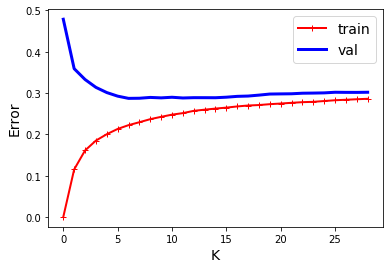

In [45]:
plt.plot((knn_training_errors), "r-+", linewidth=2, label="train")
plt.plot((knn_validation_errors), "b-", linewidth=3, label="val")
plt.legend(loc="upper right", fontsize=14)   
plt.xlabel("K", fontsize=14) 
plt.ylabel("Error", fontsize=14)


# Cross Validation Part

## Linear Regression

In [47]:
#Cross validation on the Linear Regression Mean Squared Scores
linear_model_cross_mse = cross_val_score(lr_model, train_x_pipe, train_y, scoring="neg_mean_squared_error", cv=10)
cross_linear_mse_scores = np.mean(abs(linear_model_cross_mse))

#Cross validation on the Linear Regression Abs Scores
linear_model_cross_absolute = cross_val_score(lr_model, train_x_pipe, train_y, scoring="neg_mean_absolute_error", cv=10)
cross_linear_abs_scores = np.mean(abs(linear_model_cross_absolute))

#Cross validation on the Linear regression R2 Scores
linear_model_cross_r2 = cross_val_score(lr_model, train_x_pipe, train_y, scoring="r2", cv=10)
cross_linear_r2_scores = np.mean(abs(linear_model_cross_r2))




## Support Vector Regression

In [48]:
#Cross validation on the Support Vector Regression
best_svr_model_cross = cross_val_score(svr_reg2, train_x_pipe, train_y, scoring="neg_mean_squared_error", cv=10)
best_cross_svr_scores = abs((best_svr_model_cross))


best_svr_model_cross_abs = cross_val_score(svr_reg2, train_x_pipe, train_y, scoring="neg_mean_absolute_error", cv=10)
best_cross_svr_scores_abs = abs((best_svr_model_cross_abs))


best_svr_model_cross_r2 = cross_val_score(svr_reg2, train_x_pipe, train_y, scoring="r2", cv=10)
best_cross_svr_scores_r2 = abs((best_svr_model_cross_r2))



In [49]:
svr_round_mse = np.round(np.mean(best_cross_svr_scores),4)
svr_round_abs = np.round(np.mean(best_cross_svr_scores_abs),4)
svr_round_r2 = np.round(np.mean(best_cross_svr_scores_r2),4)

## Random Forest

In [50]:
#Cross validation on the Random Forest
best_randomforest_model_cross = cross_val_score(forest_reg, train_x_pipe, train_y, scoring="neg_mean_squared_error",cv=10)
best_cross_randomforest_scores = abs((best_randomforest_model_cross))



best_randomforest_model_cross_abs = cross_val_score(forest_reg, train_x_pipe, train_y, scoring="neg_mean_absolute_error", cv=10)
best_cross_randomforest_scores_abs = abs((best_randomforest_model_cross_abs))

best_randomforest_model_cross_r2 = cross_val_score(forest_reg, train_x_pipe, train_y, scoring="r2", cv=10)
best_cross_randomforest_scores_r2 = abs((best_randomforest_model_cross_r2))


rf_round_mse = np.round(np.mean(best_cross_randomforest_scores),4)
rf_round_abs = np.round(np.mean(best_cross_randomforest_scores_abs),4)
rf_round_r2 = np.round(np.mean(best_cross_randomforest_scores_r2),4)



## KNN

In [51]:
#Cross validation on the Random Forest
best_knn_model_cross = cross_val_score(best_neighbor, train_x_pipe, train_y, scoring="neg_mean_squared_error", cv=10)
best_cross_knn_scores = abs((best_knn_model_cross))

best_knn_model_cross_abs = cross_val_score(best_neighbor, train_x_pipe, train_y, scoring="neg_mean_absolute_error", cv=10)
best_cross_knn_scores_abs = abs((best_knn_model_cross_abs))

best_knn_model_cross_r2 = cross_val_score(best_neighbor, train_x_pipe, train_y, scoring="r2", cv=10)
best_cross_knn_scores_r2 = abs((best_knn_model_cross_r2))


knn_round_mse = np.round(np.mean(best_cross_knn_scores),4)
knn_round_abs = np.round(np.mean(best_cross_knn_scores_abs),4)
knn_round_r2 = np.round(np.mean(best_cross_knn_scores_r2),4)

## Ridge Regression

In [52]:
#Cross validation on the Ridge Regeression
ridge_model_cross = cross_val_score(ridge_reg, train_x_pipe, train_y, scoring="neg_mean_squared_error", cv=10)
ridge_mse_scores = abs((ridge_model_cross))

ridge_model_cross_abs = cross_val_score(ridge_reg, train_x_pipe, train_y, scoring="neg_mean_absolute_error", cv=10)
ridge_mse_scores_abs = abs((ridge_model_cross_abs))

ridge_model_cross_r2 = cross_val_score(ridge_reg, train_x_pipe, train_y, scoring="r2", cv=10)
ridge_mse_scores_r2 = abs((ridge_model_cross_r2))


ridge_round_mse = np.round(np.mean(ridge_mse_scores),4)
ridge_round_abs = np.round(np.mean(ridge_mse_scores_abs),4)
ridge_round_r2 = np.round(np.mean(ridge_mse_scores_r2),4)


## Getting scores of models

In [53]:
#Linear Regression Cross Validation
lin_cross = np.mean(cross_linear_mse_scores)

In [54]:
#Support Vector Cross Validation

svr_cross = np.mean(best_cross_svr_scores)

In [55]:
#Random Forest Cross Validation

random_forest_cross = np.mean(best_cross_randomforest_scores)

In [56]:
#KNN Cross Validation Score
knn_cross =  np.mean(best_cross_knn_scores)

In [57]:
#Ridge Regression Cross Validation Score
ridge_cross =  np.mean(ridge_mse_scores)

In [58]:
round_linear_abs = round(cross_linear_abs_scores,4 )
round_linear_mse = round(cross_linear_mse_scores,4 )
round_linear_r2 = round(cross_linear_r2_scores,4)


In [59]:
#KNN Scores
knn_train_predict = best_neighbor.predict(train_x_pipe)
knn_test_predict = best_neighbor.predict(test_x_pipe)

knn_train_mse = round(mean_squared_error(train_y, knn_train_predict),4)
knn_train_abs = round(mean_absolute_error(train_y, knn_train_predict),4)
knn_train_r2 = round(r2_score(train_y, knn_train_predict),4)

knn_test_mse = round(mean_squared_error(test_y, knn_test_predict),4)
knn_test_abs = round(mean_absolute_error(test_y, knn_test_predict ),4)
knn_test_r2 = round(r2_score(test_y, knn_test_predict),4)



In [60]:
#Random Forest Scores

forest_train_predict = best_forest.predict(train_x_pipe)
forest_test_predict = best_forest.predict(test_x_pipe)

forest_train_mse = round(mean_squared_error(train_y, forest_train_predict),4)
forest_train_abs = round(mean_absolute_error(train_y, forest_train_predict),4)
forest_train_r2 = round(r2_score(train_y, forest_train_predict),4)

forest_test_mse = round(mean_squared_error(test_y, forest_test_predict),4)
forest_test_abs = round(mean_absolute_error(test_y, forest_test_predict),4)
forest_test_r2 = round(r2_score(test_y, forest_test_predict),4)



In [61]:
#Ridge Scores
ridge_regression_train_mse = round(mean_squared_error(train_y, ridge_prediction_train),4)
ridge_regression_train_abs = round(mean_absolute_error(train_y, ridge_prediction_train),4)
ridge_regression_train_r2 = round(r2_score(train_y, ridge_prediction_train),4)

ridge_regression_test_mse = round(mean_squared_error(test_y, ridge_prediction_test),4)
ridge_regression_test_abs = round(mean_absolute_error(test_y, ridge_prediction_test),4)
ridge_regression_test_r2 = round(r2_score(test_y, ridge_prediction_test),4)

In [62]:
#SVR model mean absolute error, mean squared error, and r square scores for both training and test set.
svr_abs_training = round(mean_absolute_error(train_y,svr_train_predict),4)
svr_mse_training = round(mean_squared_error(train_y, svr_train_predict),4)
svr_r2_score = round(r2_score(train_y, svr_train_predict), 4)

svr_abs_test = round(mean_absolute_error(test_y,svr_test_predict),4)
svr_mse_test = round(mean_squared_error(test_y, svr_test_predict),4)
svr_r2_score_test = round(r2_score(test_y, svr_test_predict), 4)




In [63]:
#Linear model mean absolute error, mean squared error, and r square scores for both training and test set.
lr_abs_training = round(mean_absolute_error(train_y,lr_train_predictions),4)
lr_mse_training = round(mean_squared_error(train_y,lr_train_predictions),4)
lr_r2_score =  round(r2_score(train_y, lr_train_predictions), 4)


lr_abs_test= round(mean_absolute_error(test_y,lr_test_predictions),4)
lr_mse_test = round(mean_squared_error(test_y, lr_test_predictions),4)
lr_r2_score_test =  round(r2_score(test_y, lr_test_predictions), 4)

In [64]:
#SVR RBF AND POLY; mean absolute error, mean squared error, and r square scores for both training and test set.

# RBF
svr_mse_training_rbf = round(mean_squared_error(train_y, svr_train_predict_rbf),4)
svr_mae_training_rbf = round(mean_absolute_error(train_y, svr_train_predict_rbf),4)
svr_r2_score = round(r2_score(train_y, svr_train_predict_rbf),4)


svr_mse_test_rbf = round(mean_squared_error(test_y, svr_test_predict_rbf),4)
svr_mae_test_rbf = round(mean_absolute_error(test_y, svr_test_predict_rbf),4)
svr_r2_score_test = round(r2_score(test_y, svr_test_predict_rbf),4)

# POLY
svr_mse_training_poly = round(mean_squared_error(train_y, svr_train_predict_poly),4)
svr_mae_training_poly = round(mean_absolute_error(train_y, svr_train_predict_poly),4)
svr_r2_score_poly = round(r2_score(train_y, svr_train_predict_poly),4)


svr_mse_test_poly = round(mean_squared_error(test_y, svr_test_predict_poly),4)
svr_mae_test_poly = round(mean_absolute_error(test_y, svr_test_predict_poly),4)
svr_r2_score_test_poly = round(r2_score(test_y, svr_test_predict_poly),4)


In [82]:
print("Model Name","       " ,"         Training split", "      ", "                                Test split")
print("          ","      MAE   ",  "     MSE   ", "        R^2","   ", "                        MAE   ",  "  MSE    ", "R^2")
 
print("Linear       ",round_linear_abs, round_linear_mse, round_linear_r2,"  ",lr_abs_test,"",lr_mse_test," ",lr_r2_score_test)
print("SVR(RBF)     ",svr_round_abs,"      ", svr_round_mse,"        ", svr_round_r2,"                         ",svr_mae_test_rbf," ",svr_mse_test_rbf," ",svr_r2_score_test)
print("Ridge Regr.  ",ridge_round_abs,"       ",ridge_round_mse,"        ",ridge_round_r2,"                         ",ridge_regression_test_abs," ",ridge_regression_test_mse," ",ridge_regression_test_r2)
print("Random Forest",rf_round_abs,"      ",rf_round_mse,"        ",rf_round_r2,"                         ",forest_test_abs ,"   ",forest_test_mse," ",forest_test_r2 )
print("KNN          ",knn_round_abs,"      ",knn_round_mse,"        ",knn_round_r2,"                         ", knn_test_abs," ",knn_test_mse," ", knn_test_r2)

Model Name                  Training split                                        Test split
                 MAE         MSE            R^2                             MAE      MSE     R^2
Linear        780197553.7217 1.397223891830864e+21 2.2074801444232728e+21    0.3861  0.2897   0.5232
SVR(RBF)      0.3445        0.2338          0.5953                           0.3471   0.2536   0.5825
Ridge Regr.   0.379         0.2645          0.5422                           0.3853   0.2898   0.523
Random Forest 0.3545        0.2381          0.5844                           0.34     0.2391   0.6065
KNN           0.4049        0.2999          0.4803                           0.4042   0.3143   0.4827


In [83]:
random_forest_best_model = r2_score(test_y,forest_test_predict)
print(random_forest_best_model)

0.6064683021583694


# Plotting part 

## Correlation x Price

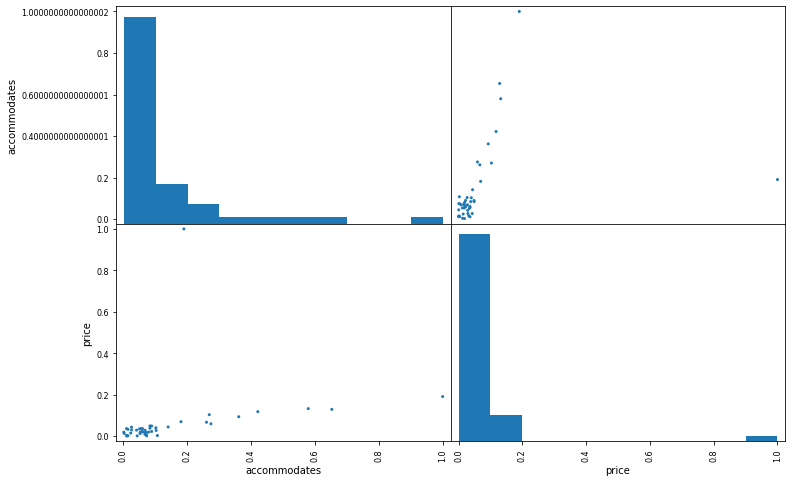

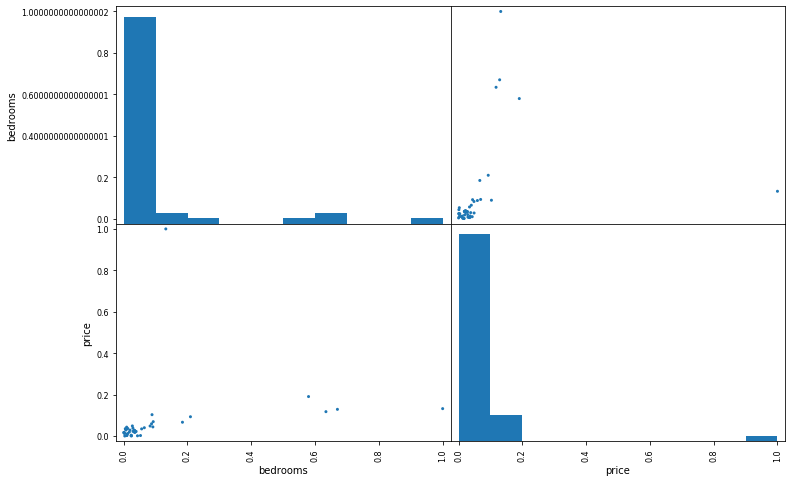

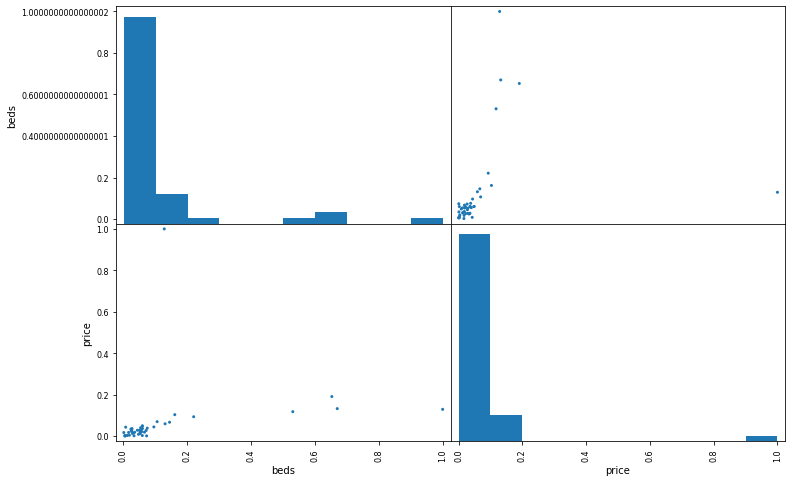

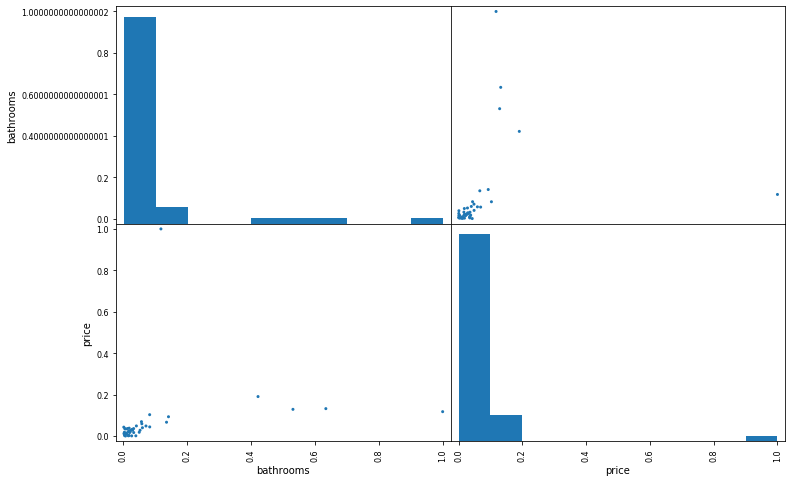

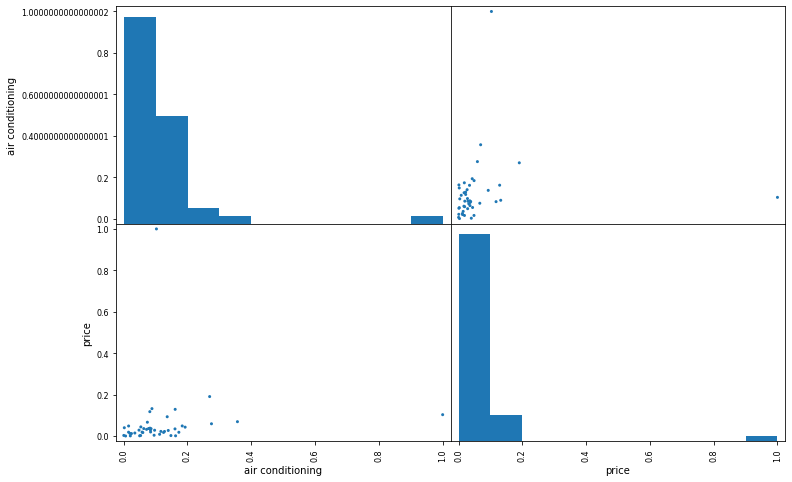

In [84]:
#getting the numerical columns
listings_v3_num_columns = num_columns(listings_v3)
#making a dataframe only numerical ones.
listings_v3_numerical = listings_v3[listings_v3_num_columns]
#dropping price because it already exists on the other data frame as the target.
listings_v3_numerical = listings_v3.drop(['price'], axis = 1)
#creating the target
listings_v3_only_price = listings_v3['price']

#concatting features and target to be able to use corr()
listings_corr_concatted = pd.concat([listings_v3_numerical,listings_v3_only_price], axis=1)

#assigned their correlation to corr_matrix
corr_matrix = listings_corr_concatted.corr().abs()
#by using price as the target, listed the correlations

#stacking the top 5
top_5_corr = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'air conditioning']

#plotting highest ones with price.
for i in corr_matrix[top_5_corr]:
    scatter_matrix(corr_matrix[[i, 'price']], figsize=(12, 8), alpha = 1)


## Room Types

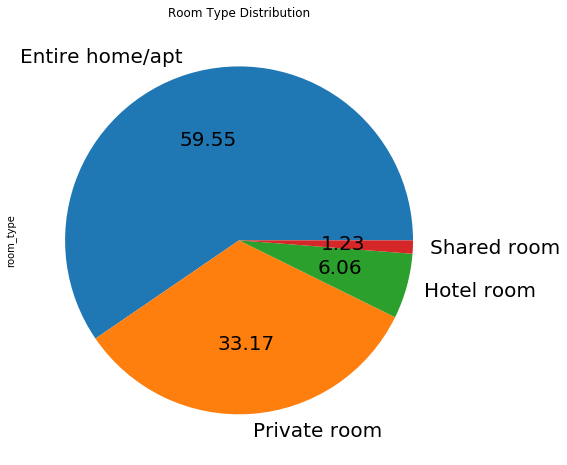

In [85]:
room_type_count_fig = train_x.room_type.value_counts()
room_type_count_fig.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');

# Geographic Map of AirBnb Data

In [86]:
#getting the airbnb data set's coordinates.
listings_geographic = ((listings.longitude.min(),   listings.longitude.max(),      
         listings.latitude.min(), listings.latitude.max()))

In [87]:
#using the opestreetmap.org and downloading the data and exporting it to the ipynb
ruh_m = plt.imread('C:/Users/Fatih/Desktop/secondmap.png')


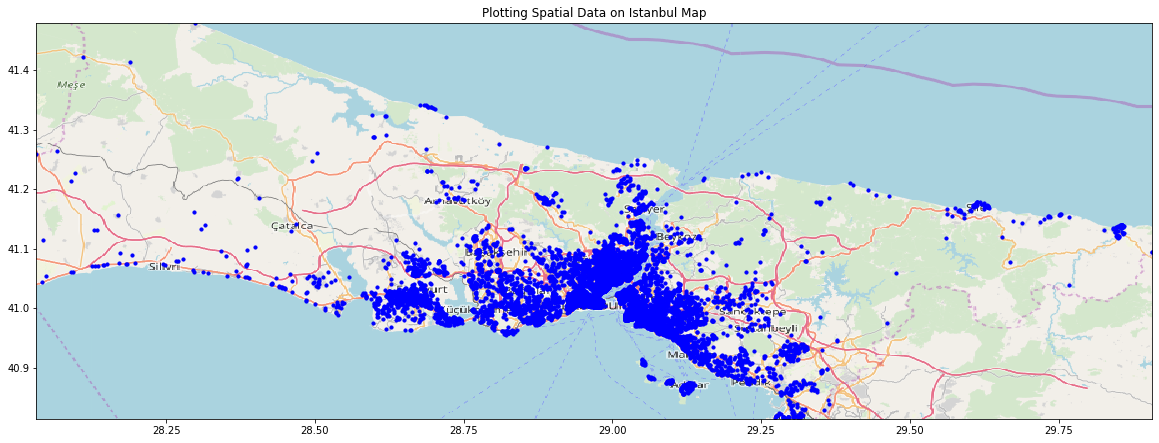

In [88]:
fig, ax = plt.subplots(figsize = (20,18))
ax.scatter(listings_v2.longitude, listings_v2.latitude, zorder=2, alpha= 1, c='b', s=10)
ax.set_title('Plotting Spatial Data on Istanbul Map')
ax.set_xlim(listings_geographic[0],listings_geographic[1])
ax.set_ylim(listings_geographic[2],listings_geographic[3])
ax.imshow(ruh_m, zorder=0, extent = listings_geographic, aspect= 'equal')

## Room type distribution

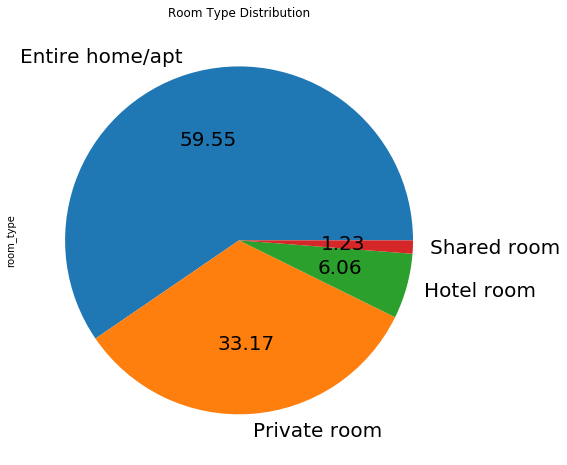

In [89]:
room_type_count_fig.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');

## Property type frequency

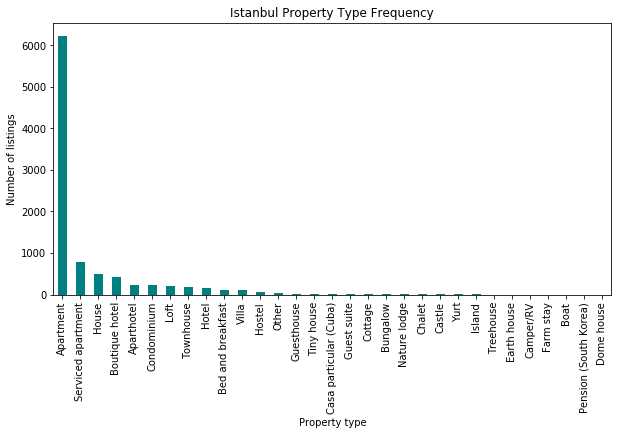

In [90]:
clean_features_property_type = train_x[train_x.property_type != 0]
property_type_count = clean_features_property_type.property_type.value_counts()

property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Istanbul Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

## Property type X Room Type = Avr. Price

In [91]:
#grouping them by property_type, room_type, and price mean
prices_data = listings_v2.groupby(['property_type','room_type']).price.mean()

#updating the prices because they were int before. they were not representing the price correctly to visualize.
for i in prices_data:
    prices_data = prices_data.replace(i, i/100)
    

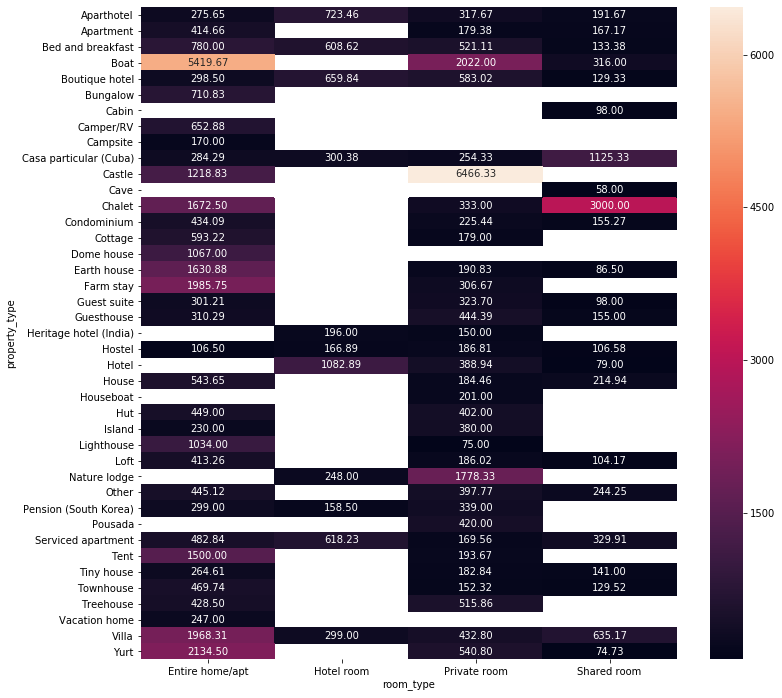

In [92]:
plt.figure(figsize=(12,12));
sns.heatmap(prices_data.unstack(),annot=True, fmt=".2f");

## Neighbourhood X Room Type = Avr. Price

In [93]:
#grouping them by neighbourhood, room_type, and price mean
neighbourhood_data = listings_v2.groupby(['neighbourhood','room_type']).price.mean()

#updating the prices because they were int before. they were not representing the price correctly to visualize.
for i in neighbourhood_data:
    neighbourhood_data = neighbourhood_data.replace(i, i/100)

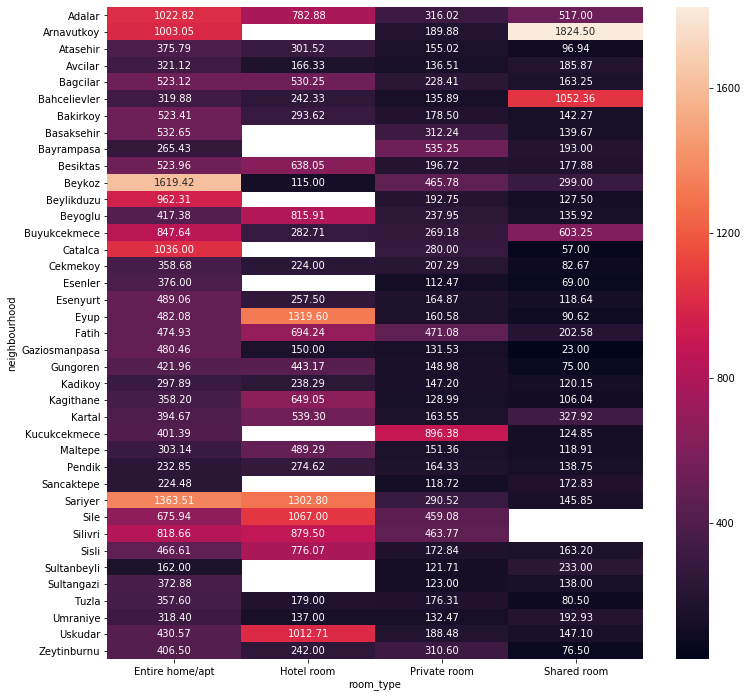

In [94]:
plt.figure(figsize=(12,12));
sns.heatmap(neighbourhood_data.unstack(),annot=True, fmt=".2f")

## Which room types are most profitable?

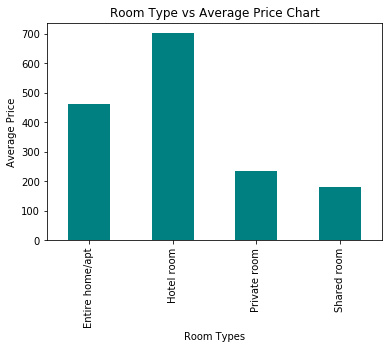

In [95]:
#groupby, roomtype.
price_per_room_type = listings_v2.groupby('room_type').price.mean()

for i in price_per_room_type:
    price_per_room_type = price_per_room_type.replace(i, i/100)



price_per_room_type.plot(kind='bar', color='teal');
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart');

## Which neighbourhoods are most profitable?

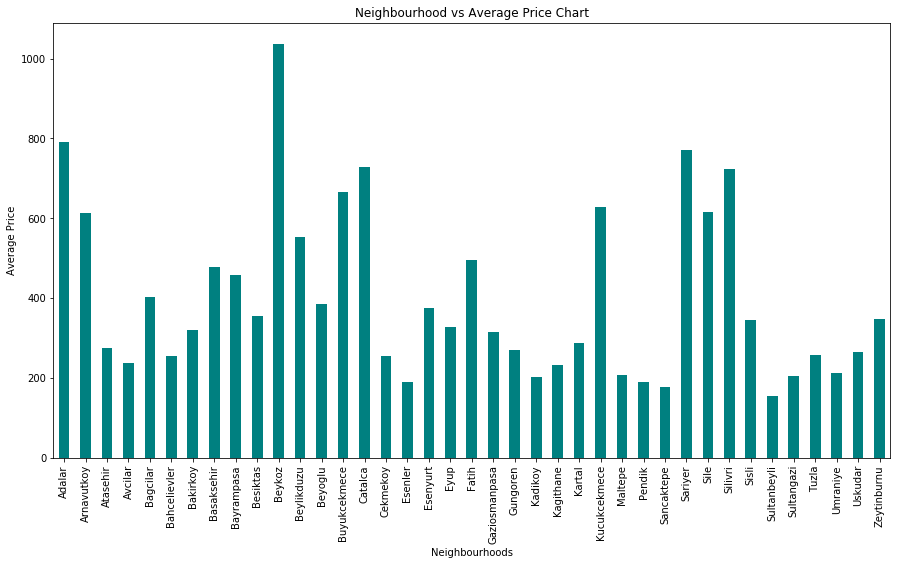

In [96]:
#neighbourhood
price_per_neighbourhood = listings_v2.groupby('neighbourhood').price.mean()

for i in price_per_neighbourhood:
    price_per_neighbourhood = price_per_neighbourhood.replace(i, i/100)

    
plt.figure(figsize=(15,8));
price_per_neighbourhood.plot(kind='bar', color='teal');
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart');

## What kind of property is most profitable?

In [97]:
#Property type
price_per_property_type = listings_v2.groupby('property_type').price.mean()

for i in price_per_property_type:
    price_per_property_type = price_per_property_type.replace(i, i/100) 



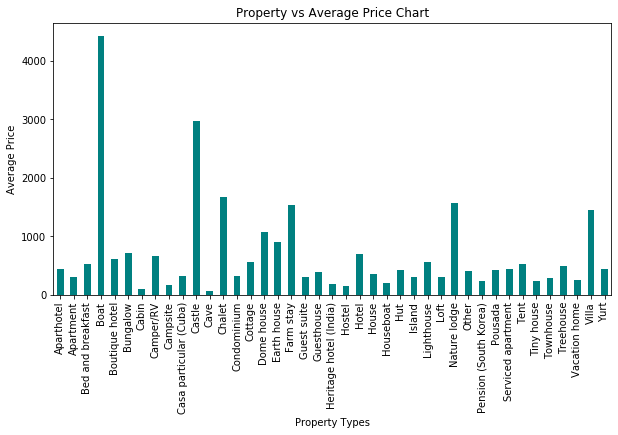

In [98]:
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

## Property type x Neighbourhood = Avr. Reviews

In [99]:
#Looking at what can be correlated with the reviews.
ratings_per_neighbourhood = listings_v2.groupby(
    ['neighbourhood', 'property_type']).review_scores_rating.mean()

for i in ratings_per_neighbourhood:
    ratings_per_neighbourhood = ratings_per_neighbourhood.replace(i, i/100) 

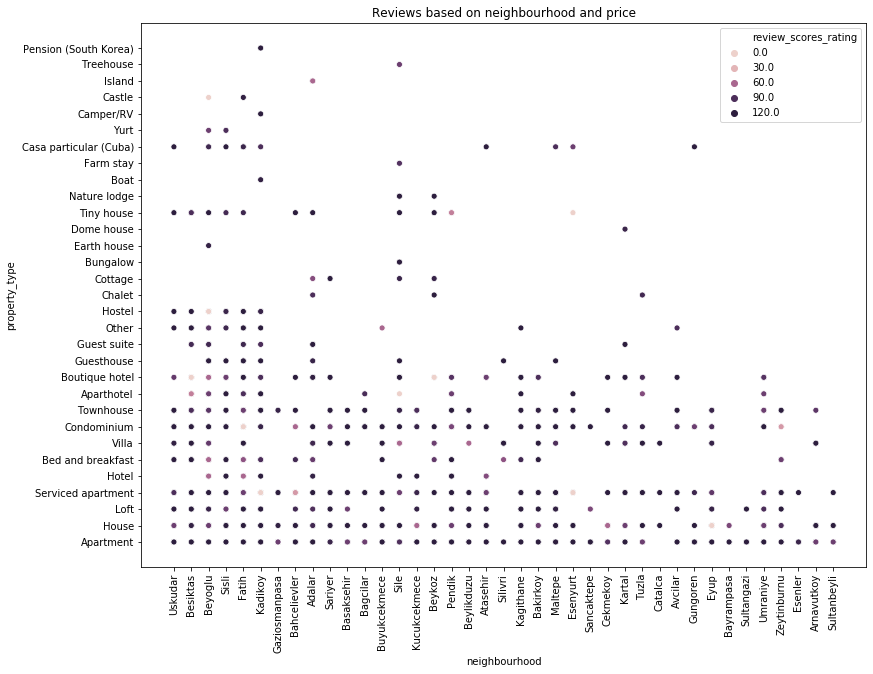

In [100]:
plt.figure(figsize=(13, 10))
sns.scatterplot(x='neighbourhood', y='property_type', hue='review_scores_rating', data=listings_v2);
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price');